### Library Installation

In the following cell, we are installing several Python libraries necessary for our analysis:

- `pandas`, `numpy`, and `seaborn` for data manipulation and visualization.
- `matplotlib` for plotting and visualizations.
- `sklearn` for machine learning, including regression, classification, and model selection tools.

In [1]:
# Install the required libraries (uncomment to install)
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install sklearn
# !pip install seaborn

In [2]:
# Basic Data Handling
import pandas as pd
import numpy as np
from datetime import datetime

# Visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px 
%matplotlib inline

# Interactive Web Applications
import dash  
from dash import dcc, html 
from dash.dependencies import Input, Output

# Machine Learning - Model Selection & Assessment
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Machine Learning - Models
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeClassifier

# Machine Learning - Preprocessing
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder

# Machine Learning - Metrics
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, accuracy_score, mean_absolute_error
from sklearn import metrics

# Configuration and Warnings
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output


In [3]:
#reading the cleaned file prepared for Machine Learning, which was exported into a csv format in the EDA and Stats - bikedata notebook

bikes_data_2022 = pd.read_csv("dublin_bike_data_for_ML.csv")

In [76]:
bikes_data_2022.head()

,station id,time,name,bike_stands,available_bike_stands,available_bikes,address,latitude,longitude,capacity_ratio,hour,day_of_week,usage
0,1,2022-08-01 00:00:02,CLARENDON ROW,31,12,19,Clarendon Row,53.3409,-6.26250,0.612903,0,0,moderate
1,2,2022-08-01 00:00:02,BLESSINGTON STREET,20,5,14,Blessington Street,53.3568,-6.26814,0.700000,0,0,moderate
2,3,2022-08-01 00:00:02,BOLTON STREET,20,8,12,Bolton Street,53.3512,-6.26986,0.600000,0,0,moderate
3,4,2022-08-01 00:00:02,GREEK STREET,20,1,17,Greek Street,53.3469,-6.27298,0.850000,0,0,low
4,5,2022-08-01 00:00:02,CHARLEMONT PLACE,40,19,21,Charlemont Street,53.3307,-6.26018,0.525000,0,0,moderate


In [77]:
bikes_data_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168144 entries, 0 to 168143
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   station id             168144 non-null  int64         
 1   time                   168144 non-null  datetime64[ns]
 2   name                   168144 non-null  object        
 3   bike_stands            168144 non-null  int64         
 4   available_bike_stands  168144 non-null  int64         
 5   available_bikes        168144 non-null  int64         
 6   address                168144 non-null  object        
 7   latitude               168144 non-null  float64       
 8   longitude              168144 non-null  float64       
 9   capacity_ratio         168144 non-null  float64       
 10  hour                   168144 non-null  int64         
 11  day_of_week            168144 non-null  int64         
 12  usage                  168144 non-null  obje

In [78]:
bikes_data_2022["station id"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117], dtype=int64)

For the time-series analysis and prediction of available bikes in Dublin only the TIME column will be used along with the available bikes. A calculation is performed in order to sum the available bikes for each value of the TIME column. 

In [79]:
bikes_data_2022['time'] = pd.to_datetime(bikes_data_2022['time'])

bikes_aggregated = bikes_data_2022.groupby('time')['available_bikes'].sum().reset_index()

bikes_aggregated = bikes_aggregated.sort_values(by='time')

bikes_aggregated.head()


,time,available_bikes
0,2022-08-01 00:00:02,1376
1,2022-08-01 00:30:03,1383
2,2022-08-01 01:00:02,1407
3,2022-08-01 01:30:03,1408
4,2022-08-01 02:00:03,1409


In [80]:
bikes_aggregated.size

2976

A new pandas Series object is created named available_bikes_series_22. This is a one-dimensional array-like structure designed to store a sequence of values. This is done so that the data is in a proper format that reflects the nature of the information being time-indexed data.

In [81]:
bikes_aggregated['time'] = pd.to_datetime(bikes_aggregated['time'])
available_bikes_series_22 = pd.Series(data=bikes_aggregated['available_bikes'].values, index=bikes_aggregated['time'])

available_bikes_series_22

time
2022-08-01 00:00:02    1376
2022-08-01 00:30:03    1383
2022-08-01 01:00:02    1407
2022-08-01 01:30:03    1408
2022-08-01 02:00:03    1409
                       ... 
2022-08-31 21:30:02    1368
2022-08-31 22:00:03    1386
2022-08-31 22:30:02    1377
2022-08-31 23:00:02    1372
2022-08-31 23:30:02    1395
Length: 1488, dtype: int64

In [82]:
available_bikes_series_22.size

1488

Text(0, 0.5, 'Available bikes')

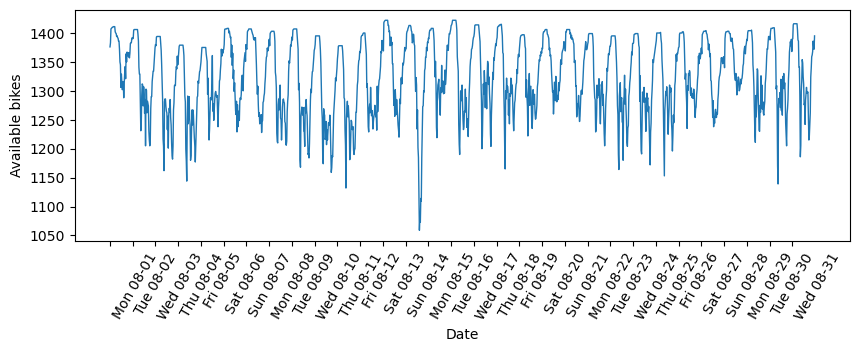

In [83]:
plt.figure(figsize = (10, 3))

xticks = pd.date_range(start = available_bikes_series_22.index.min().normalize(), end = available_bikes_series_22.index.max().normalize(), freq = 'D')

plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation = 60, ha = "left")

plt.plot(available_bikes_series_22, linewidth = 1)
plt.xlabel("Date")
plt.ylabel("Available bikes")

In [84]:
xticks

DatetimeIndex(['2022-08-01', '2022-08-02', '2022-08-03', '2022-08-04',
               '2022-08-05', '2022-08-06', '2022-08-07', '2022-08-08',
               '2022-08-09', '2022-08-10', '2022-08-11', '2022-08-12',
               '2022-08-13', '2022-08-14', '2022-08-15', '2022-08-16',
               '2022-08-17', '2022-08-18', '2022-08-19', '2022-08-20',
               '2022-08-21', '2022-08-22', '2022-08-23', '2022-08-24',
               '2022-08-25', '2022-08-26', '2022-08-27', '2022-08-28',
               '2022-08-29', '2022-08-30', '2022-08-31'],
              dtype='datetime64[ns]', freq='D')

In [85]:
available_bikes_series_22.index.astype("int64").values
available_bikes_series_22.values

array([1376, 1383, 1407, ..., 1377, 1372, 1395], dtype=int64)

In [86]:
available_bikes_series_22.index.astype("int64").values.reshape(-1, 1) 

array([[1659312002000000000],
       [1659313803000000000],
       [1659315602000000000],
       ...,
       [1661985002000000000],
       [1661986802000000000],
       [1661988602000000000]], dtype=int64)

In [87]:
y = available_bikes_series_22.values

# convert to POSIX time by dividing by 10**9
X = available_bikes_series_22.index.astype("int64").values.reshape(-1, 1) // 10**9

X.shape, y.shape

((1488, 1), (1488,))

In [88]:
print(X[:20])

[[1659312002]
 [1659313803]
 [1659315602]
 [1659317403]
 [1659319203]
 [1659321002]
 [1659322803]
 [1659324602]
 [1659326403]
 [1659328202]
 [1659330003]
 [1659331802]
 [1659333602]
 [1659335402]
 [1659337202]
 [1659339002]
 [1659340802]
 [1659342602]
 [1659344403]
 [1659346203]]


Around 80% of the data is used for training, and the other 20% for testing. The first 1100 data points are used for the testing, because when dealing with timeseries data it is good practice to use the data in a chronological order - using the first data entries for training, and the other ones for testing. 

As multiple models will be used and comapred a function is created in order to follow the good practices. 

In [96]:
# use the first 1100 data points for training and the rest for testing
n_train = 1100

def eval_on_features(features, target, regressor, plot=False):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]    
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    r2 = regressor.score(X_test, y_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Test-set R^2: {r2:.2f}")
    print(f"Test-set MAE: {mae:.2f}")
    print(f"Test-set MSE: {mse:.2f}")
    
    if plot:
        plt.figure(figsize = (10, 3))

        tick_positions = np.linspace(0, len(X) - 1, len(xticks), dtype=int)

        plt.xticks(tick_positions, xticks.strftime("%a %m-%d"), rotation=90, ha="left")


        plt.plot(range(n_train), y_train, label = "train")
        plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label = "test")
        plt.plot(range(n_train), y_pred_train, '--', label = "prediction train")

        plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label = "prediction test")
        plt.legend(loc = (1.01, 0))
        plt.xlabel("Date")
        plt.ylabel("Rentals")
    
    return r2, mae, mse

In [97]:
print(X, y)

[[1659312002]
 [1659313803]
 [1659315602]
 ...
 [1661985002]
 [1661986802]
 [1661988602]] [1376 1383 1407 ... 1377 1372 1395]


In [98]:
len(xticks)

31

In [99]:
len(X)

1488

Test-set R^2: -0.00
Test-set MAE: 51.48
Test-set MSE: 3601.98


(-8.273386795343285e-05, 51.475773195876286, 3601.9780412371133)

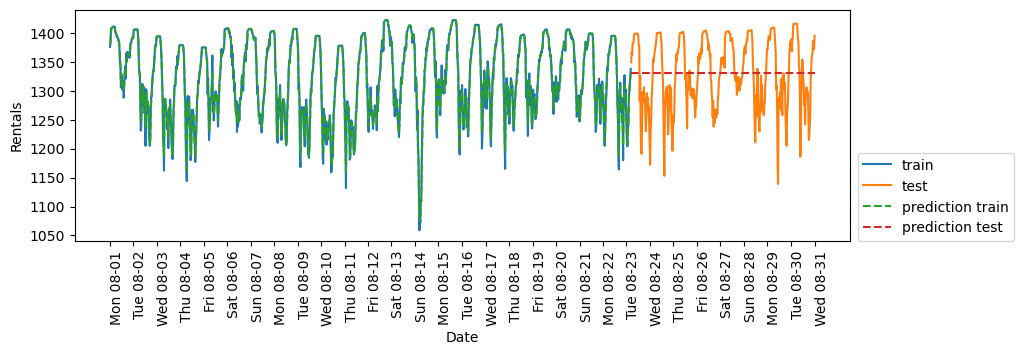

In [100]:
regressor_random_forest = RandomForestRegressor(n_estimators = 100, random_state = 0)

eval_on_features(X, y, regressor_random_forest, plot=True)

We can see that the model is performing poorly. The accuracy is 0, meaning that the model can not predict the data. In order to improve the accuracy, more features will be extracted from the TIME column. First, the hour will be extracted and the model will be trained again. 

In [101]:
X_hour = available_bikes_series_22.index.hour.values.reshape(-1, 1)

print(X_hour)

[[ 0]
 [ 0]
 [ 1]
 ...
 [22]
 [23]
 [23]]


Test-set R^2: 0.73
Test-set MAE: 21.11
Test-set MSE: 974.33


(0.7294796743395573, 21.10659488174371, 974.3276628410265)

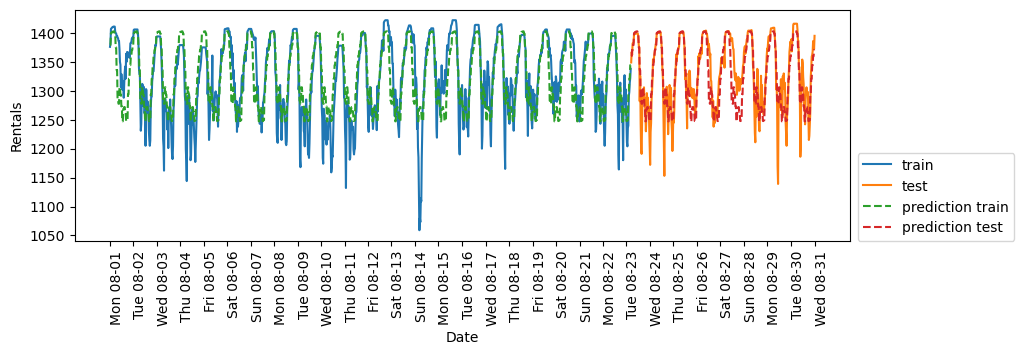

In [102]:
eval_on_features(X_hour, y, regressor_random_forest, plot=True)

Using the hour feature within the model, a huge improvement can be observed. The accuracy of the model is 0.73, meaning that the model can now preddict the data for avaialble bikes with quite good accuracy. There is still room for improvemen - another feature will be introduced and the model will be trained again. 

In [24]:
X_day_hour_week = np.hstack([available_bikes_series_22.index.dayofweek.values.reshape(-1, 1), available_bikes_series_22.index.hour.values.reshape(-1, 1)])

print(X_day_hour_week, type(X_hour), y)

[[ 0  0]
 [ 0  0]
 [ 0  1]
 ...
 [ 2 22]
 [ 2 23]
 [ 2 23]] <class 'numpy.ndarray'> [1376 1383 1407 ... 1377 1372 1395]


In [25]:
type(X_day_hour_week)

numpy.ndarray

Test-set R^2: 0.78
Test-set MAE: 19.60
Test-set MSE: 798.69


(0.7782440414669616, 19.597575503009246, 798.6940141043943)

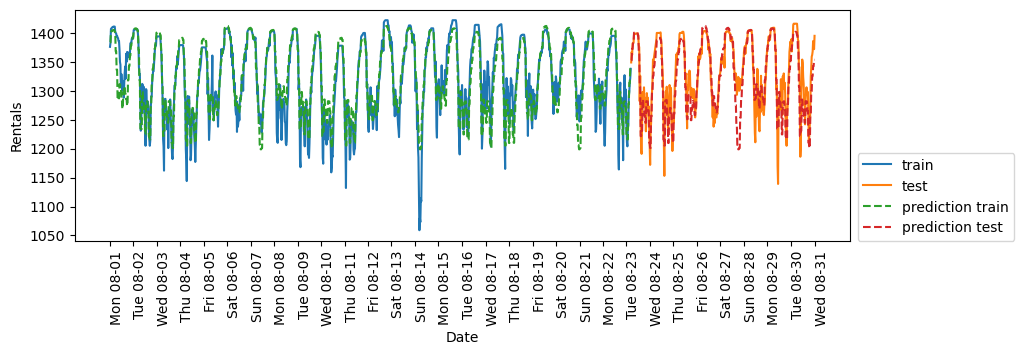

In [26]:
X_day_hour_week = np.hstack([available_bikes_series_22.index.dayofweek.values.reshape(-1, 1), available_bikes_series_22.index.hour.values.reshape(-1, 1)])

eval_on_features(X_day_hour_week, y, regressor_random_forest, plot=True)

An improvement of 0.05 can be observed, however this is quite good. 

Applying linear regreession

Test-set R^2: 0.14
Test-set MAE: 45.60
Test-set MSE: 3089.54


(0.14219588001355843, 45.598357516180144, 3089.535994610873)

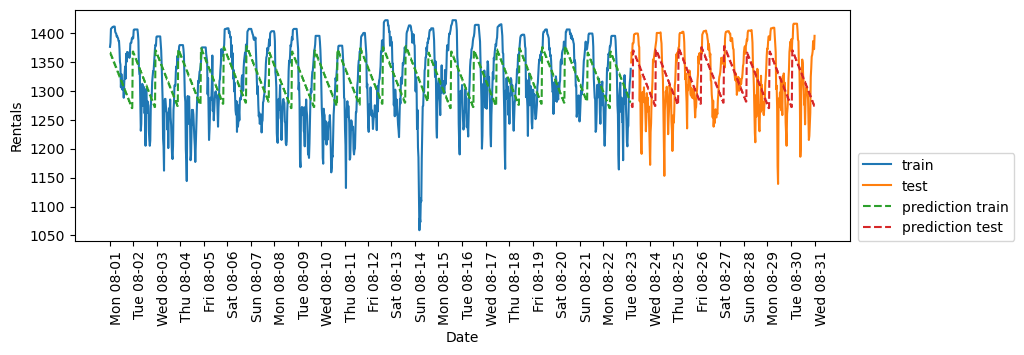

In [27]:
regressor_linear_regression = LinearRegression()

eval_on_features(X_day_hour_week, y, regressor_linear_regression, plot=True)

The model is performing poorly. One hot encoder will be applied in order to try and improve the accuracy of the linear regression.

In [28]:
enc = OneHotEncoder()

X_day_hour_week_onehot = enc.fit_transform(X_day_hour_week).toarray()

X_day_hour_week_onehot

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

Test-set R^2: 0.72
Test-set MAE: 24.46
Test-set MSE: 1003.44


(0.7213964858494849, 24.45618556701031, 1003.4407216494845)

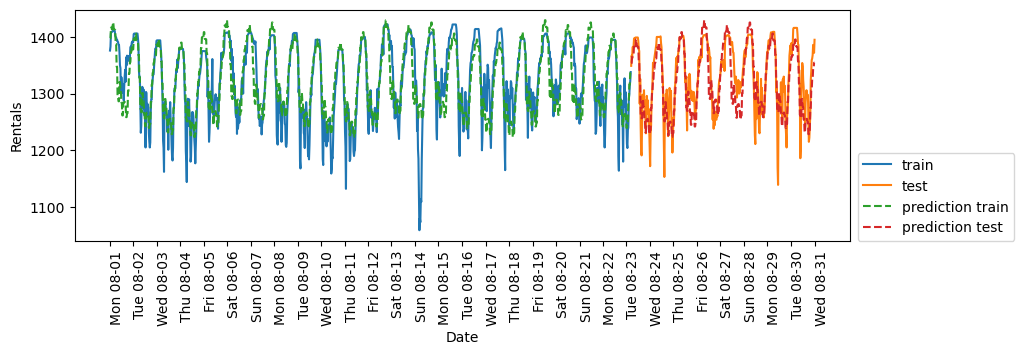

In [29]:
eval_on_features(X_day_hour_week_onehot, y, regressor_linear_regression, plot=True)

A big improvement can be observed.

Test-set R^2: 0.73
Test-set MAE: 24.40
Test-set MSE: 982.65


(0.7271701991391442, 24.397205124050654, 982.6456536201454)

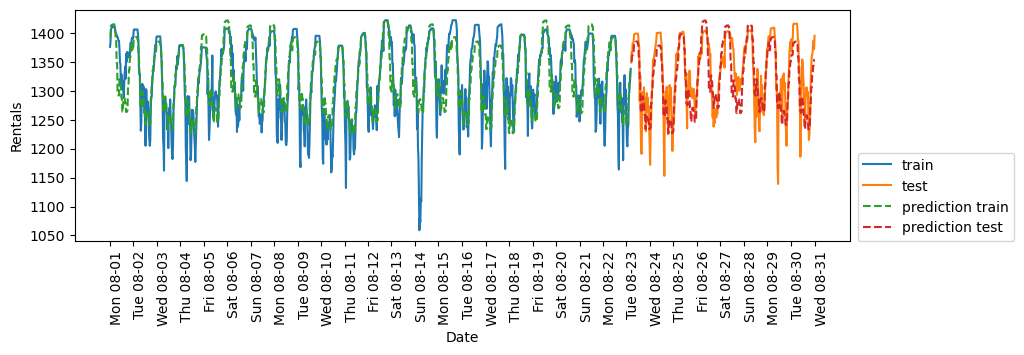

In [30]:
regressor_ridge = Ridge()

eval_on_features(X_day_hour_week_onehot, y, regressor_ridge, plot=True)

Feature engineering was applied to create polynomial and interaction terms from the original data, enhancing the feature set for a Ridge regression model. This approach aims to capture more complex relationships and interactions between variables, improving the model's predictive performance and accuracy up to 0.79. This is the model performing the best. 

Test-set R^2: 0.79
Test-set MAE: 19.59
Test-set MSE: 751.81


(0.7912619914638656, 19.594436497162388, 751.8075231743725)

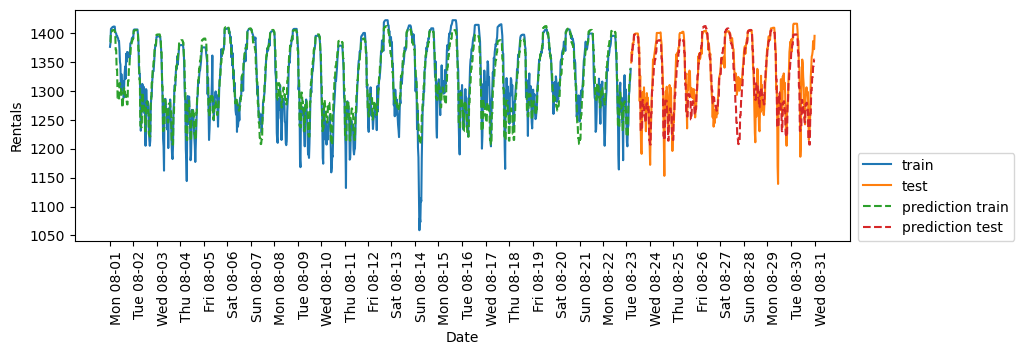

In [31]:
poly_transformer = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)

X_day_hour_week_onehot_poly = poly_transformer.fit_transform(X_day_hour_week_onehot)

lr_poly = Ridge()

eval_on_features(X_day_hour_week_onehot_poly, y, lr_poly, plot=True)

In [32]:
test_score_rf = eval_on_features(X_day_hour_week, y, regressor_random_forest)
test_score_lr = eval_on_features(X_day_hour_week_onehot, y, regressor_linear_regression)
test_score_lr_poly = eval_on_features(X_day_hour_week_onehot_poly, y, lr_poly)

Test-set R^2: 0.78
Test-set MAE: 19.60
Test-set MSE: 798.69
Test-set R^2: 0.72
Test-set MAE: 24.46
Test-set MSE: 1003.44
Test-set R^2: 0.79
Test-set MAE: 19.59
Test-set MSE: 751.81


In [33]:
models = ['Random Forest', 'Linear Regression', 'Ridge w/ Poly Features']

scores = [test_score_rf, test_score_lr, test_score_lr_poly]

results_df = pd.DataFrame(scores, columns=['R² Score', 'MAE', 'MSE'], index=models)
print(results_df)

                        R² Score        MAE          MSE
Random Forest           0.778244  19.597576   798.694014
Linear Regression       0.721396  24.456186  1003.440722
Ridge w/ Poly Features  0.791262  19.594436   751.807523


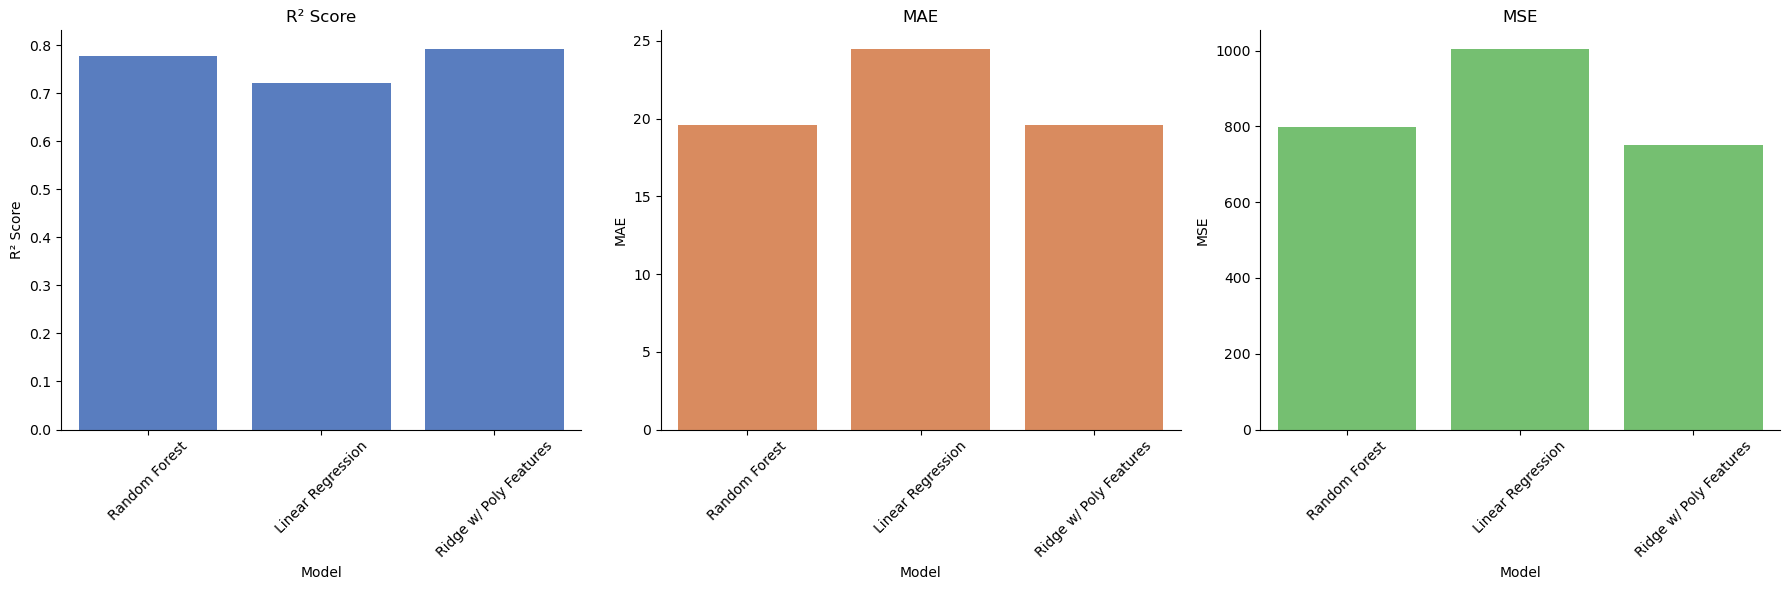

In [34]:
muted_palette = sns.color_palette("muted")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

titles = ['R² Score', 'MAE', 'MSE']

for i, metric in enumerate(results_df.columns):
    sns.barplot(ax=axes[i], x=results_df.index, y=results_df[metric], color=muted_palette[i])
    axes[i].set_title(titles[i])
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Model')
    axes[i].tick_params(axis='x', rotation=45)  

sns.despine()
plt.tight_layout()
plt.show()


The "Ridge with Polynomial Features" model outperforms both the Random Forest and the Linear Regression in all three metrics considered. It explains more variance and generally makes smaller errors in its predictions. Therefore, based on these metrics, Linear Regression with Polynomial Features appears to be the best-performing model.

In [50]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Dublin Total Bike Availability Dashboard for August 2022"),
    html.Label([ 
        "Select Time Range",
        dcc.DatePickerRange(
            id='date-picker-range',
            min_date_allowed=bikes_aggregated['time'].min(),
            max_date_allowed=bikes_aggregated['time'].max(),
            start_date=bikes_aggregated['time'].min(),
            end_date=bikes_aggregated['time'].max(),
            display_format='YYYY-MM-DD HH:mm:ss'
        )
    ]),
    dcc.Graph(id='time-series-chart'),
    dcc.Graph(id='heatmap-chart'),
    dcc.Graph(id='station-map'),
    dcc.Graph(id='bar-chart')
])


@app.callback(
    Output('time-series-chart', 'figure'),
    [Input('date-picker-range', 'start_date'),
     Input('date-picker-range', 'end_date')]
)
def update_time_series(start_date, end_date):
    mask = (bikes_aggregated['time'] >= start_date) & (bikes_aggregated['time'] <= end_date)
    filtered_df = bikes_aggregated.loc[mask]
    
    fig = px.line(filtered_df, x='time', y='available_bikes', title='Total Available Bikes Over Time')
    
    fig.update_layout(transition_duration=500)
    
    return fig


@app.callback(
    Output('heatmap-chart', 'figure'),
    [Input('date-picker-range', 'start_date'),
     Input('date-picker-range', 'end_date')]
)
def update_heatmap(start_date, end_date):
    mask = (bikes_aggregated['time'] >= start_date) & (bikes_aggregated['time'] <= end_date)
    filtered_df = bikes_aggregated.loc[mask]

    filtered_df['hour'] = filtered_df['time'].dt.hour
    filtered_df['day'] = filtered_df['time'].dt.day_name()

    heatmap_data = filtered_df.pivot_table(values='available_bikes', index='day', columns='hour', aggfunc='mean')

    fig = px.imshow(heatmap_data, aspect="auto", title='Bike Availability Heatmap')
    
    return fig


@app.callback(
    Output('bar-chart', 'figure'),
    [Input('date-picker-range', 'start_date'),
     Input('date-picker-range', 'end_date')]
)
def update_bar_chart(start_date, end_date):
    mask = (bikes_data_2022['time'] >= start_date) & (bikes_data_2022['time'] <= end_date)
    filtered_df = bikes_data_2022.loc[mask]

    avg_bikes = filtered_df.groupby('name')['available_bikes'].mean().reset_index()

    fig = px.bar(avg_bikes, x='name', y='available_bikes', title='Average Bike Availability by Station')
    
    return fig

@app.callback(
    Output('station-map', 'figure'),
    [Input('date-picker-range', 'start_date'),
     Input('date-picker-range', 'end_date')]
)
def update_station_map(start_date, end_date):
    mask = (bikes_data_2022['time'] >= start_date) & (bikes_data_2022['time'] <= end_date)
    filtered_df = bikes_data_2022.loc[mask]

    latest_bikes = filtered_df.groupby(['name', 'latitude', 'longitude'])['available_bikes'].last().reset_index()

    fig = px.scatter_mapbox(latest_bikes,
                            lat="latitude",
                            lon="longitude",
                            size="available_bikes",
                            color="available_bikes",
                            hover_name="name",
                            zoom=11,
                            center={"lat": latest_bikes['latitude'].mean(), "lon": latest_bikes['longitude'].mean()},
                            title="Bike Station Locations",
                            mapbox_style="open-street-map")
    
    return fig



if __name__ == '__main__':
    app.run_server(debug=True, port=8051)

The app.layout is set to a Div (a division in HTML) containing various components:

html.H1("Dublin Total Bike Availability Dashboard for August 2022"): This creates a header (H1) for the dashboard.

html.Label and dcc.DatePickerRange: This section creates a label and a date range picker for selecting a time range. The min_date_allowed, max_date_allowed, start_date, and end_date are set based on the minimum and maximum dates in bikes_aggregated['time'].

dcc.Graph(id='...'): These lines create placeholders for four different graphs: a time series chart, a heatmap, a station map, and a bar chart.


Then, all the functions created make a callback in order to update the relevant visualization based on the provided date range. The port used is not the default one, because I was receiving an error that the port is in use (because another testing visualization was created). This is the reason why another port was chosen.

## Decision Tree and Random Forest 

In order to perform the Decision Tree and Random Forest classifiers, a target variable will be created for the usage of the bikes. Based on the performed calculation, the usage will be divided in three: 
- high
- low
- moderate


In [51]:
bikes_data_2022['time'] = pd.to_datetime(bikes_data_2022['time'])

bikes_data_2022['hour'] = bikes_data_2022['time'].dt.hour
bikes_data_2022['day_of_week'] = bikes_data_2022['time'].dt.dayofweek

# Assuming high usage: less than 20% bikes available, low usage: more than 80% bikes available
threshold_high = 0.20
threshold_low = 0.80
bikes_data_2022['usage'] = np.where(bikes_data_2022['available_bikes'] / bikes_data_2022['bike_stands'] <= threshold_high, 'high', 
                         np.where(bikes_data_2022['available_bikes'] / bikes_data_2022['bike_stands'] >= threshold_low, 'low', 'moderate'))


In [52]:
bikes_data_2022.head()

,station id,time,name,bike_stands,available_bike_stands,available_bikes,address,latitude,longitude,capacity_ratio,hour,day_of_week,usage
0,1,2022-08-01 00:00:02,CLARENDON ROW,31,12,19,Clarendon Row,53.3409,-6.26250,0.612903,0,0,moderate
1,2,2022-08-01 00:00:02,BLESSINGTON STREET,20,5,14,Blessington Street,53.3568,-6.26814,0.700000,0,0,moderate
2,3,2022-08-01 00:00:02,BOLTON STREET,20,8,12,Bolton Street,53.3512,-6.26986,0.600000,0,0,moderate
3,4,2022-08-01 00:00:02,GREEK STREET,20,1,17,Greek Street,53.3469,-6.27298,0.850000,0,0,low
4,5,2022-08-01 00:00:02,CHARLEMONT PLACE,40,19,21,Charlemont Street,53.3307,-6.26018,0.525000,0,0,moderate


In [53]:
X = bikes_data_2022[['hour', 'day_of_week', 'bike_stands', 'latitude', 'longitude']]  # Features
y = bikes_data_2022['usage']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
clf = RandomForestClassifier(n_estimators = 100)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [55]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6661842835619697


The accuracy for the Random Forest is moderate with room for improvement. 

## Finding Important Features in Scikit-learn

In [56]:
clf = RandomForestClassifier(n_estimators = 100)

clf.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
feature_imp = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_imp

hour           0.370419
day_of_week    0.231834
latitude       0.177674
longitude      0.174999
bike_stands    0.045073
dtype: float64

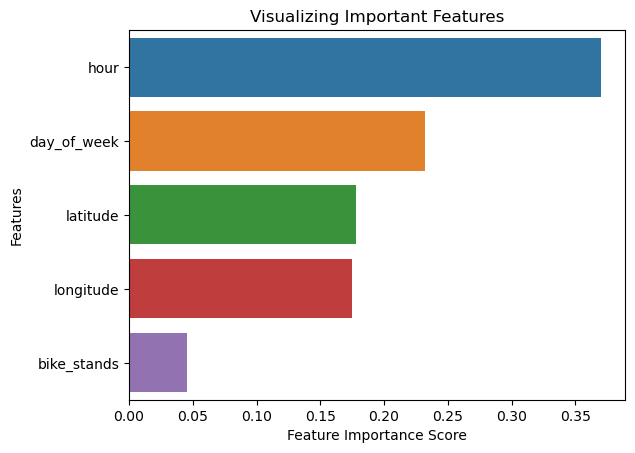

In [58]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

The least important feature is the bike stands, so the model will be trained again without the bike stands feature. 

In [59]:
X = bikes_data_2022[['hour', 'day_of_week', 'latitude', 'longitude']]  

y = bikes_data_2022['usage']                                       

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

accuracy_rf = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6672746015383395


A very small improvement can be observed. 

**Decision Tree**

In [61]:
classifier = DecisionTreeClassifier(max_depth = 10, random_state = 42)

classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [62]:
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

        high       0.68      0.64      0.66     18886
         low       0.67      0.41      0.51      6548
    moderate       0.65      0.74      0.69     25010

    accuracy                           0.66     50444
   macro avg       0.67      0.60      0.62     50444
weighted avg       0.66      0.66      0.65     50444



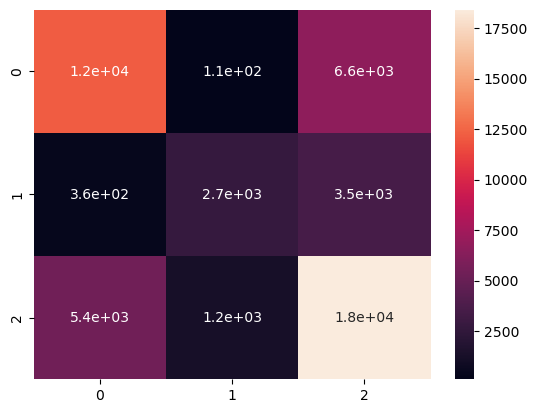

In [63]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

In [64]:
accuracy_dt = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6594441360716834


The Decision Tree is performing a bit less accurate compared to the Random Forest.

A grid search will be performed in order to optimize hyperparameters for a Decision Tree Classifier by evaluating various combinations of 'max_depth', 'min_samples_split', 'min_samples_leaf', and 'max_features' to determine the best-performing model configuration.

In [65]:
param_grid = {
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt']
}

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(best_params)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2}


In [66]:
best_params = grid_search.best_params_

optimized_classifier = DecisionTreeClassifier(**best_params)

optimized_classifier.fit(X_train, y_train)

y_pred_optimized = optimized_classifier.predict(X_test)
accuracy_optimized = metrics.accuracy_score(y_test, y_pred_optimized)
print("Optimized Accuracy:", accuracy_optimized)

Optimized Accuracy: 0.6889620172864959


A modest improvement of 4% can be observed after grid search optimization of its hyperparameters, suggesting that tuning these parameters has effectively enhanced the model's performance, making it better suited to capture the underlying patterns in the data and potentially improving its accuracy.

In [67]:
k = 10 
cv_scores = cross_val_score(optimized_classifier, X, y, cv=k)

cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

print(f"Average CV Accuracy: {cv_mean:.4f}, Standard Deviation: {cv_std:.4f}")


Average CV Accuracy: 0.6231, Standard Deviation: 0.0201


In [68]:
final_classifier = DecisionTreeClassifier(**best_params)

final_classifier.fit(X, y)

DecisionTreeClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=10)

In [69]:
print("Accuracy for Random Forest:",accuracy_rf)
print("Accuracy for Decision Tree:",accuracy_dt)
print("Accuracy for Decision Tree tuning:",accuracy_optimized)

Accuracy for Random Forest: 0.6672746015383395
Accuracy for Decision Tree: 0.6594441360716834
Accuracy for Decision Tree tuning: 0.6889620172864959


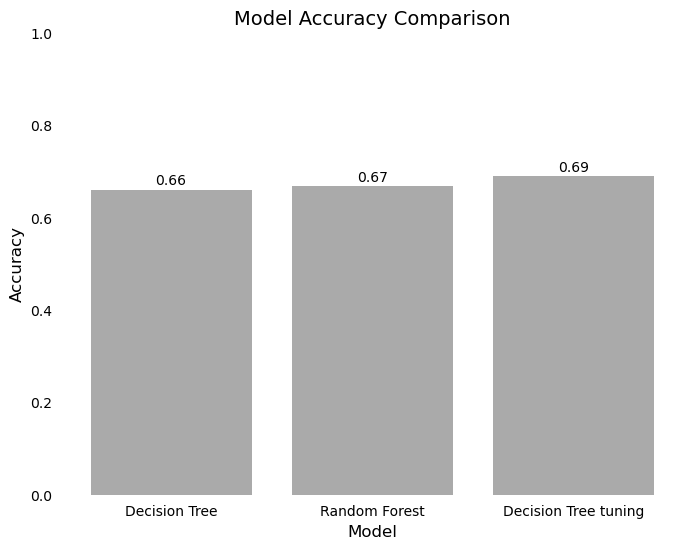

In [70]:
models = ['Decision Tree', 'Random Forest', 'Decision Tree tuning']
accuracies = [accuracy_dt, accuracy_rf, accuracy_optimized]

plt.figure(figsize=(8, 6))

bars = plt.bar(models, accuracies, color='#AAAAAA')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy Comparison', fontsize=14)
plt.ylim(0, 1) 

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()
